In [1]:
# Importing necessary libraries
import pandas as pd
import networkx as nx
import json

In [6]:
df = pd.read_csv(r"C:\Users\tabee\OneDrive\Desktop\UMASSD\2024\Sem IV Fall 2024\Data Visualisation\Major_Assignment3\data_scopus.csv")
df = df.fillna(0)

In [14]:
# Showing the data ponts with o for NaN values
df.head(5)

Title  Year  \
0  Virtual reality applications for the built env...  2020   
1  Self-tracking while doing sport: Comfort, moti...  2020   
2  Bridge damage: Detection, IFC-based semantic e...  2020   
3  VR system for spatio-temporal visualization of...  2019   
4  DiseaSE: A biomedical text analytics system fo...  2019   

                  EID                                           Abstract  \
0  2-s2.0-85086464158  With its advanced capabilities of immersive an...   
1  2-s2.0-85082875828  The spread of wearable technologies is paving ...   
2  2-s2.0-85078194587  Building Information Modeling (BIM) representa...   
3  2-s2.0-85075706132  Social media analysis is helpful to understand...   
4  2-s2.0-85074886243  Due to increasing volume and unstructured natu...   

             Publisher Conference name Conference date  \
0        Elsevier B.V.               0               0   
1       Academic Press               0               0   
2        Elsevier B.V.               0               0   
3             Springer               0               0   
4  Academic Press Inc.               0               0   

                                             Authors  \
0        Zhang Y., Liu H., Kang S.-C., Al-Hussein M.   
1                               Rapp A., Tirabeni L.   
2  Isailović D., Stojanovic V., Trapp M., Richter...   
3  Okada K., Yoshida M., Itoh T., Czauderna T., S...   
4               Abulaish M., Parwez M.A., Jahiruddin   

                                        Author(s) ID  \
0    57202536919;53984550800;57215426514;6603541102;   
1                           23398572100;57191836654;   
2  57205293410;56421700900;24831175200;3619515940...   
3  57201502480;57171240600;35373203100;2592569550...   
4                6505934038;57202719622;35590173900;   

                           Authors with affiliations  \
0  Zhang, Y., Department of Civil and Environment...   
1  Rapp, A., Computer Science Department, Univers...   
2  Isailović, D., Department for Construction Pro...   
3  Okada, K., Ochanomizu University, Tokyo, Japan...   
4  Abulaish, M., Department of Computer Science, ...   

                                      Source title Abbreviated Source Title  \
0                       Automation in Construction             Autom Constr   
1  International Journal of Human Computer Studies    Int J Hum Comput Stud   
2                       Automation in Construction             Autom Constr   
3                Multimedia Tools and Applications    Multimedia Tools Appl   
4                Journal of Biomedical Informatics   J. Biomed. Informatics   

   Cited by Affiliation Country  
0       0.0              Canada  
1       0.0               Italy  
2       0.0             Germany  
3       0.0           Australia  
4       0.0               India

In [15]:
# Create an empty undirected graph using NetworkX
G = nx.Graph()

# Iterate over each row in the dataframe `df`
for _, row in df.iterrows():
    # Split the 'Authors' column value into a list of individual authors
    authors = row['Authors'].split(', ')
    # Extract the unique identifier for the publication (EID)
    eid = row['EID']
    
    # Add edges between each pair of authors for this publication
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # Create an edge between two authors with the publication ID as an attribute
            G.add_edge(authors[i], authors[j], publication=eid)

# Convert the graph into a node-link format suitable for JSON serialization
data = nx.readwrite.json_graph.node_link_data(G)

# Define the path to save the JSON file
output_path = "/Users/jisusingh/Downloads/DV_DSC530/Assignments/force_layout_d3js-main/data_file.json"

# Write the graph data to a JSON file
with open(output_path, 'w') as f:
    json.dump(data, f, indent=2)

# Print a confirmation message with the output path
print(f"Network data saved as JSON: {output_path}")


Network data saved as JSON: /Users/jisusingh/Downloads/DV_DSC530/Assignments/force_layout_d3js-main/data_file.json


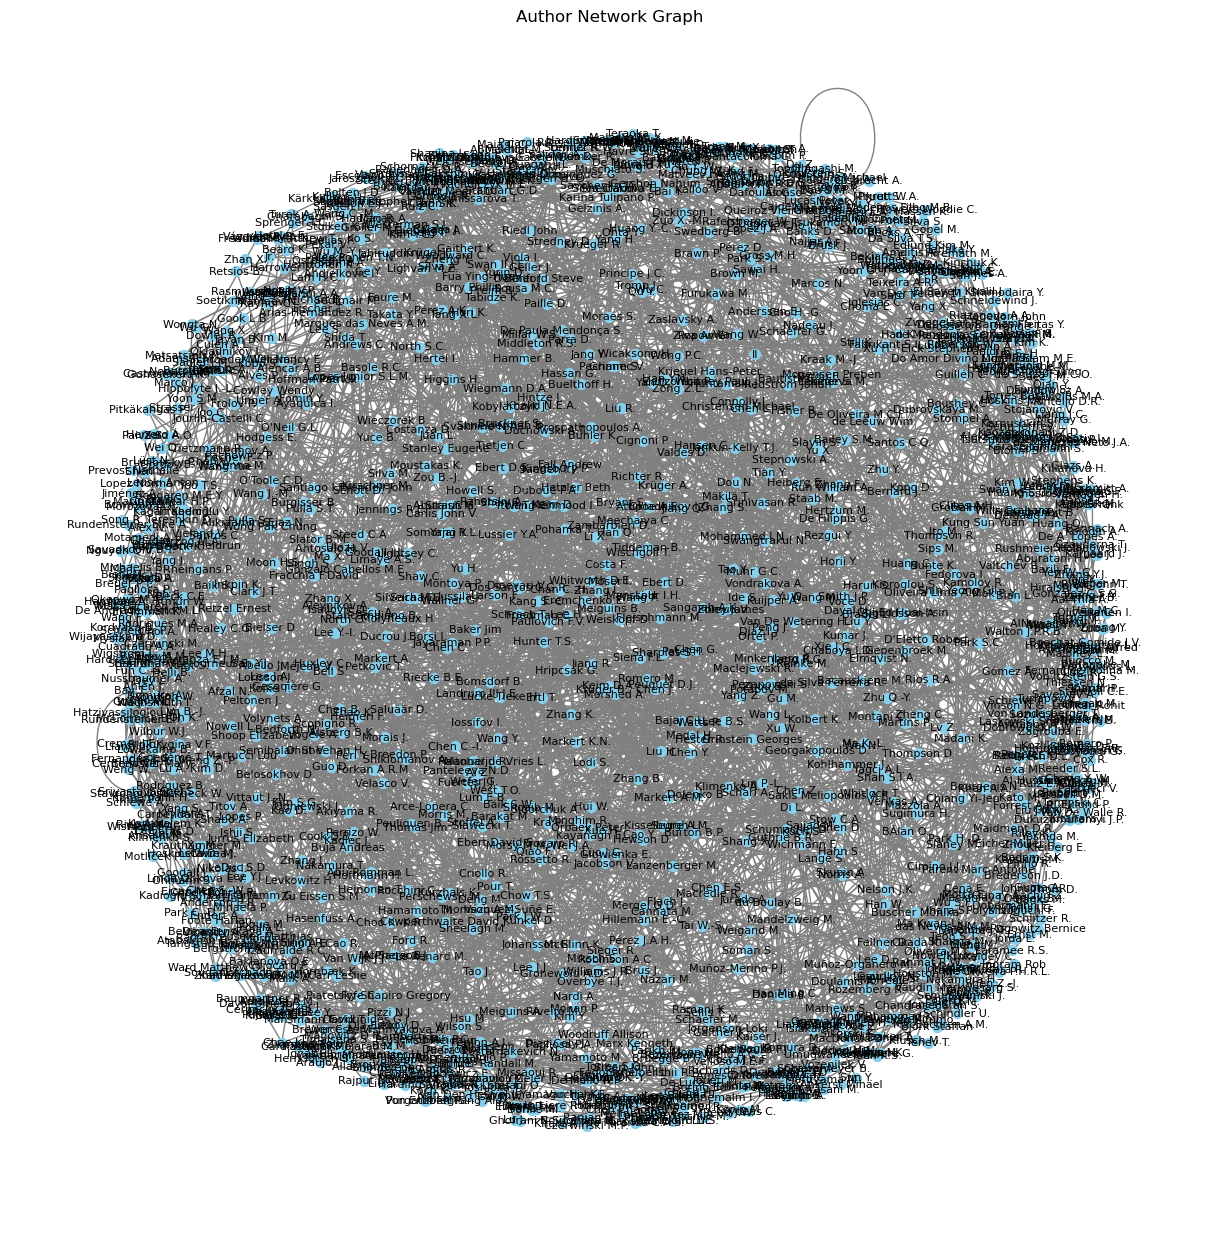

In [16]:
# Import required modules
import json  # For handling JSON data
import matplotlib.pyplot as plt  # For plotting the graph
from networkx.readwrite import json_graph  # For working with JSON-encoded graphs in NetworkX

# Load the graph data from the JSON file
with open("/Users/jisusingh/Downloads/DV_DSC530/Assignments/force_layout_d3js-main/data_file.json") as f:
    data = json.load(f)

# Recreate the graph object from the JSON data
G = json_graph.node_link_graph(data)

# Set up the plot dimensions
plt.figure(figsize=(12, 12))  # Create a figure with specified size

# Generate positions for the nodes using a spring layout
# `k=0.5` adjusts the spacing between nodes for better visualization
pos = nx.spring_layout(G, k=0.5)

# Draw the graph with custom visualization settings
nx.draw(
    G, 
    pos, 
    with_labels=True,  # Display labels for the nodes
    node_size=50,  # Set the size of the nodes
    font_size=8,  # Set the font size for labels
    edge_color="gray",  # Set the color of the edges
    node_color="skyblue"  # Set the color of the nodes
)

# Add a title to the graph
plt.title("Author Network Graph")

# Display the graph visualization
plt.show()


In [17]:
df['Affiliation Country'] = df['Authors with affiliations'].apply(lambda x: x.split(', ')[-1] if x != 0 else 0)

top_countries = df['Affiliation Country'].value_counts().nlargest(10).index.tolist()

In [19]:
# The top 10 countries
top_countries

['United States',
 'Germany',
 'United Kingdom',
 'South Korea',
 'China',
 'Canada',
 'Russian Federation',
 'Japan',
 'Brazil',
 'Australia']

In [9]:
import matplotlib.colors as mcolors

color_map = {country: color for country, color in zip(top_countries, plt.cm.tab10.colors)}
# color code
default_color = "#A9A9A9"

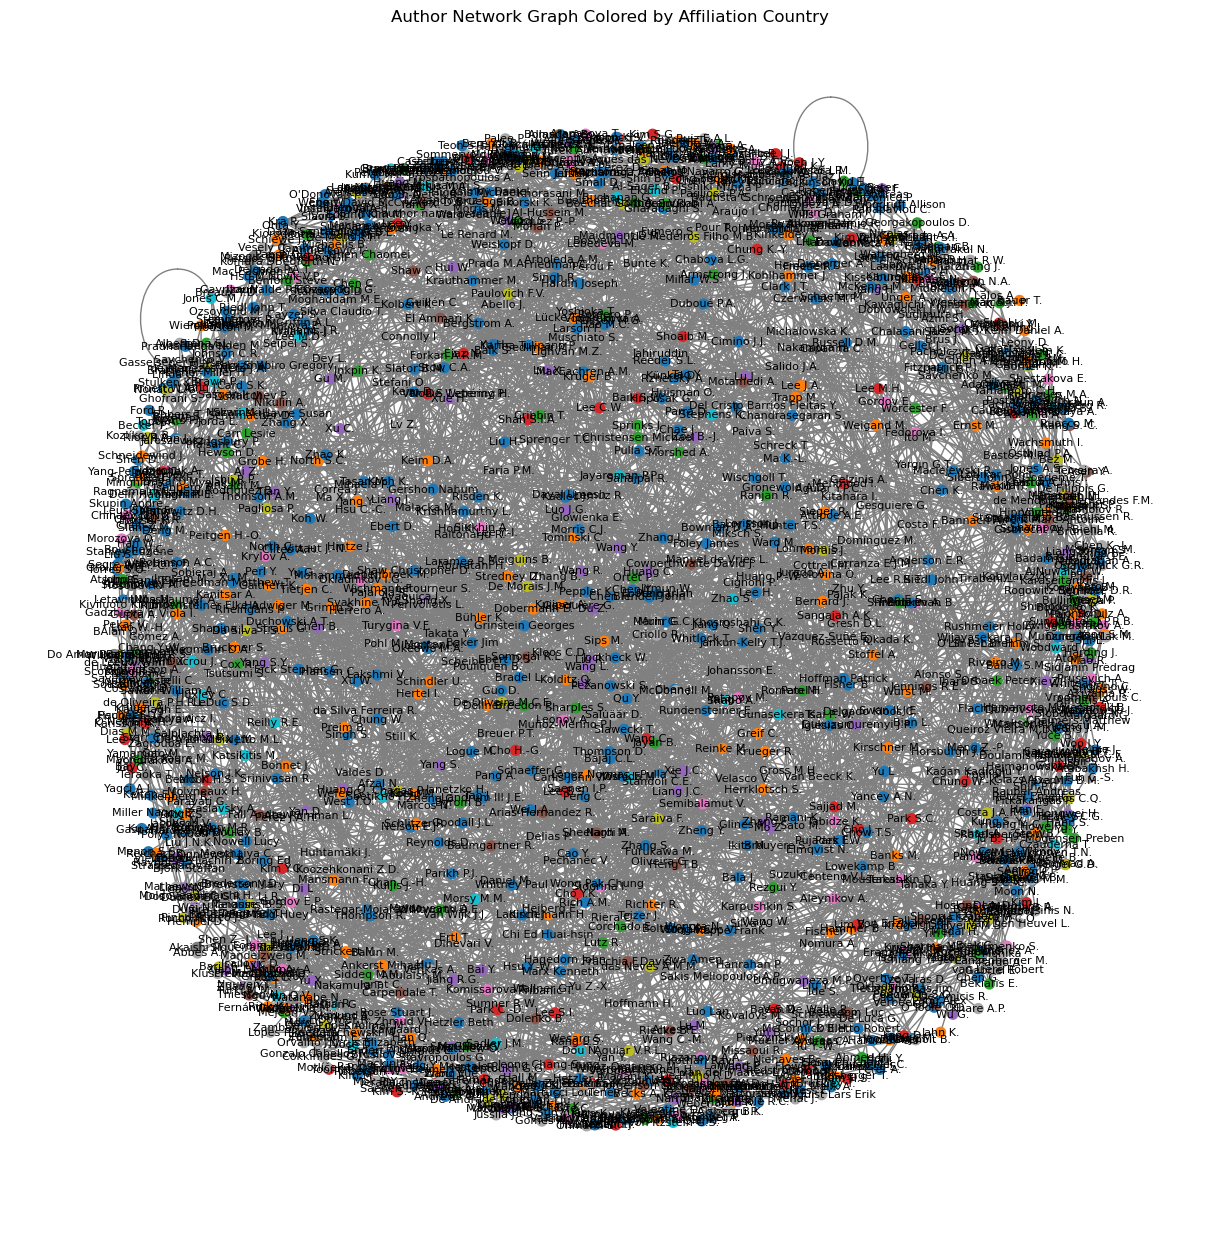

In [20]:
# Create an empty undirected graph
G = nx.Graph()

# Iterate over each row in the DataFrame `df`
for _, row in df.iterrows():
    # Split the 'Authors' column value into a list of individual authors
    authors = row['Authors'].split(', ')
    # Extract the unique identifier for the publication (EID)
    eid = row['EID']
    # Get the author's affiliation country
    country = row['Affiliation Country']
    # Determine the node color based on the author's country using a color map
    node_color = color_map.get(country, default_color)
    
    # Add each author as a node in the graph with the assigned color attribute
    for author in authors:
        G.add_node(author, color=node_color)
    
    # Add edges between all pairs of authors for this publication
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # Create an edge between two authors with the publication ID as an attribute
            G.add_edge(authors[i], authors[j], publication=eid)

# Set up the plot dimensions
plt.figure(figsize=(12, 12))

# Generate positions for the nodes using a spring layout
# `k=0.5` adjusts the spacing between nodes for better visualization
pos = nx.spring_layout(G, k=0.5)

# Extract the color attribute for each node to set their colors in the graph
node_colors = [G.nodes[author]["color"] for author in G.nodes]

# Draw the graph with custom visualization settings
nx.draw(
    G, 
    pos, 
    with_labels=True,  # Display labels for the nodes
    node_size=50,  # Set the size of the nodes
    font_size=8,  # Set the font size for labels
    edge_color="gray",  # Set the color of the edges
    node_color=node_colors  # Use the assigned colors for nodes based on their country
)

# Add a title to the graph
plt.title("Author Network Graph Colored by Affiliation Country")

# Display the graph visualization
plt.show()
